# Webscrape 1

In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import time
from tqdm import tqdm
import pickle as pkl
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.common.exceptions import TimeoutException
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [5]:
neigh_class = KNeighborsClassifier(n_neighbors=50)

In [6]:
neigh_reg = KNeighborsRegressor(n_neighbors=50)

In [7]:
# pkl.dump([], open('test.p','wb'))

In [8]:
root_url ='https://www.carspecs.us'

In [9]:
# refise rear and front suspension fearures no 54

# Initial Data Cleaning - Eliminating Duplicates, Creating Uniform Classes and Transforming Numbers to Floats and Integers

In [10]:
df_reg_1 = pkl.load(open('df_pickles/df_reg_1.p','rb'))

In [11]:
df_elec = pkl.load(open('df_pickles/df_elec.p','rb'))

In [12]:
df_gas = pkl.load(open('df_pickles/df_gas.p','rb'))

In [13]:
df_reg_1[df_reg_1['price'] == 'price not given']

,price,Passenger Doors,Passenger Capacity,Base engine size,Cylinders,Fuel tank capacity,EPA mileage (combined),Engine type,Horsepower,Torque,...,Front Tire Size,Front Wheel Diameter,Rear Suspension Type,Rear Tire Size,Rear Wheel Diameter,extra_options,Battery Range,brand,model,trim
/cars/2019/audi/a3-cabriolet/77677,price not given,2,4,2,4,13.2,NaN,Gas,186,221,...,P225/45HR17,17,Independent Multi-Link,P225/45HR17,17,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Cabriolet 2.0 TFSI Premium FWD
/cars/2019/audi/a3-cabriolet/77678,price not given,2,4,2,4,13.2,NaN,Gas,186,221,...,P225/40HR18,17,Independent Multi-Link,P225/40HR18,17,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Cabriolet 2.0 TFSI Premium Plus FWD
/cars/2019/audi/a3-cabriolet/77679,price not given,2,4,2,4,14.5,NaN,Gas,220,258,...,P225/40HR18,17,Independent Multi-Link,P225/40HR18,17,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Cabriolet 2.0 TFSI Premium Plus quattro AWD
/cars/2019/audi/a3-cabriolet/77680,price not given,2,4,2,4,14.5,NaN,Gas,220,258,...,P225/45HR17,17,Independent Multi-Link,P225/45HR17,17,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Cabriolet 2.0 TFSI Premium quattro AWD
/cars/2019/audi/a3-cabriolet/77681,price not given,2,4,2,4,13.2,NaN,Gas,186,221,...,P225/40HR18,18,Independent Multi-Link,P225/40HR18,18,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Cabriolet 2.0 TFSI Prestige FWD
/cars/2019/audi/a3-cabriolet/77682,price not given,2,4,2,4,14.5,NaN,Gas,220,258,...,P225/40HR18,18,Independent Multi-Link,P225/40HR18,18,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Cabriolet 2.0 TFSI Prestige quattro AWD
/cars/2019/audi/a3-sedan/77683,price not given,4,5,2,4,13.2,NaN,Gas,186,221,...,P225/45HR17,17,Independent Multi-Link,P225/45HR17,17,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Sedan 2.0 TFSI Premium FWD
/cars/2019/audi/a3-sedan/77684,price not given,4,5,2,4,13.2,NaN,Gas,186,221,...,P225/40HR18,17,Independent Multi-Link,P225/40HR18,17,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Sedan 2.0 TFSI Premium Plus FWD
/cars/2019/audi/a3-sedan/77685,price not given,4,5,2,4,14.5,NaN,Gas,220,258,...,P225/40HR18,17,Independent Multi-Link,P225/40HR18,17,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Sedan 2.0 TFSI Premium Plus quattro AWD
/cars/2019/audi/a3-sedan/77686,price not given,4,5,2,4,14.5,NaN,Gas,220,258,...,P225/45HR17,17,Independent Multi-Link,P225/45HR17,17,"[ABS And Driveline Traction Control, Airbag Oc...",NaN,Audi,A3,Sedan 2.0 TFSI Premium quattro AWD


In [86]:
df_gas

,price,passenger_doors,passenger_capacity,base_engine_size,Cylinders,fuel_tank_capacity,epa_mileage_combined,engine_type,Horsepower,Torque,...,Height,Wheelbase,Width,front_suspension_type,front_wheel_diameter,rear_suspension_type,rear_wheel_diameter,brand,model,gear_ratios
/cars/2019/acura/ilx/79088,25900,4,5,2.4,4.0,13.2,28,1,201,180,...,55.6,105.1,70.6,6,17,3,17,0,123,9.36906
/cars/2019/acura/ilx/79090,27650,4,5,2.4,4.0,13.2,28,1,201,180,...,55.6,105.1,70.6,6,17,3,17,0,123,9.36906
/cars/2019/acura/ilx/79089,29650,4,5,2.4,4.0,13.2,28,1,201,180,...,55.6,105.1,70.6,6,18,3,18,0,123,9.36906
/cars/2019/acura/ilx/79092,29550,4,5,2.4,4.0,13.2,28,1,201,180,...,55.6,105.1,70.6,6,17,3,17,0,123,9.36906
/cars/2019/acura/ilx/79091,31550,4,5,2.4,4.0,13.2,28,1,201,180,...,55.6,105.1,70.6,6,18,3,18,0,123,9.36906
/cars/2019/acura/mdx/77624,44300,4,7,3.5,6.0,19.5,23,1,290,267,...,67.4,111,77.7,6,18,3,18,0,144,28.5586
/cars/2019/acura/mdx/77621,56050,4,6,3.5,6.0,19.5,23,1,290,267,...,67.4,111,77.7,6,20,3,20,0,144,28.5586
/cars/2019/acura/mdx/77620,58050,4,7,3.5,6.0,19.5,23,1,290,267,...,67.4,111,77.7,6,20,3,20,0,144,28.5586
/cars/2019/acura/mdx/77623,49300,4,7,3.5,6.0,19.5,23,1,290,267,...,67.4,111,77.7,6,20,3,20,0,144,28.5586
/cars/2019/acura/mdx/77622,51300,4,6,3.5,6.0,19.5,23,1,290,267,...,67.4,111,77.7,6,20,3,20,0,144,28.5586


In [13]:
df_gas[df_gas['price'] == 'price not given']['price']

/cars/2019/audi/a3-cabriolet/77677        price not given
/cars/2019/audi/a3-cabriolet/77678        price not given
/cars/2019/audi/a3-cabriolet/77679        price not given
/cars/2019/audi/a3-cabriolet/77680        price not given
/cars/2019/audi/a3-cabriolet/77681        price not given
/cars/2019/audi/a3-cabriolet/77682        price not given
/cars/2019/audi/a3-sedan/77683            price not given
/cars/2019/audi/a3-sedan/77684            price not given
/cars/2019/audi/a3-sedan/77685            price not given
/cars/2019/audi/a3-sedan/77686            price not given
/cars/2019/audi/a3-sedan/77687            price not given
/cars/2019/audi/a3-sedan/77688            price not given
/cars/2019/audi/a4/77692                  price not given
/cars/2019/audi/a4/77696                  price not given
/cars/2019/audi/a4-allroad/77690          price not given
/cars/2019/audi/a4-allroad/77689          price not given
/cars/2019/audi/a4-allroad/77691          price not given
/cars/2019/aud

In [14]:
df_elec[df_elec['price'] == 'price not given']['price']

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: price, dtype: int64)

In [14]:
df_gas.columns

Index(['price', 'Passenger Doors', 'Passenger Capacity', 'Base engine size',
       'Cylinders', 'Fuel tank capacity', 'EPA mileage (combined)',
       'Engine type', 'Horsepower', 'Torque', 'Drive type', 'Transmission',
       'First Gear Ratio', 'Second Gear Ratio', 'Third Gear Ratio',
       'Fourth Gear Ratio', 'Fifth Gear Ratio', 'Sixth Gear Ratio',
       'third_row_seating', 'first_row_seating', 'rear_row_seating',
       'Curb weight', 'Dead Weight Hitch - Max Tongue Weight',
       'Dead Weight Hitch - Max Trailer Weight', 'Height', 'Wheelbase',
       'Width', 'Front Suspension Type', 'Front Tire Size',
       'Front Wheel Diameter', 'Rear Suspension Type', 'Rear Tire Size',
       'Rear Wheel Diameter', 'extra_options', 'brand', 'model', 'trim'],
      dtype='object')

In [15]:
for i,r in df_gas[df_gas['price'] == 'price not given']['price'].items():
    df_gas.loc[i, 'price'] = np.nan

In [16]:
df_gas[df_gas['price'].isna()]

,price,Passenger Doors,Passenger Capacity,Base engine size,Cylinders,Fuel tank capacity,EPA mileage (combined),Engine type,Horsepower,Torque,...,Front Suspension Type,Front Tire Size,Front Wheel Diameter,Rear Suspension Type,Rear Tire Size,Rear Wheel Diameter,extra_options,brand,model,trim
/cars/2019/audi/a3-cabriolet/77677,NaN,2,4,2,4,13.2,27.14,1,186,221,...,6,98,17,3,90,17,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,532
/cars/2019/audi/a3-cabriolet/77678,NaN,2,4,2,4,13.2,27.14,1,186,221,...,6,90,17,3,86,17,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,533
/cars/2019/audi/a3-cabriolet/77679,NaN,2,4,2,4,14.5,25.826,1,220,258,...,6,90,17,3,86,17,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,534
/cars/2019/audi/a3-cabriolet/77680,NaN,2,4,2,4,14.5,25.826,1,220,258,...,6,98,17,3,90,17,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,535
/cars/2019/audi/a3-cabriolet/77681,NaN,2,4,2,4,13.2,27.14,1,186,221,...,6,90,18,3,86,18,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,536
/cars/2019/audi/a3-cabriolet/77682,NaN,2,4,2,4,14.5,25.826,1,220,258,...,6,90,18,3,86,18,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,537
/cars/2019/audi/a3-sedan/77683,NaN,4,5,2,4,13.2,27.14,1,186,221,...,6,98,17,3,90,17,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,1558
/cars/2019/audi/a3-sedan/77684,NaN,4,5,2,4,13.2,27.14,1,186,221,...,6,90,17,3,86,17,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,1559
/cars/2019/audi/a3-sedan/77685,NaN,4,5,2,4,14.5,25.826,1,220,258,...,6,90,17,3,86,17,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,1560
/cars/2019/audi/a3-sedan/77686,NaN,4,5,2,4,14.5,25.826,1,220,258,...,6,98,17,3,90,17,"[ABS And Driveline Traction Control, Airbag Oc...",3,24,1561


In [17]:
def knn_predictor(df,X,y,model):
    df_no_nan = pd.concat([df[X],df[y]],axis=1).dropna()
    X_ = df_no_nan[X]
    y_ = df_no_nan[y]
    print(np.array(y_).reshape(1,-1)[0])
    model.fit(X_, list(np.array(y_).reshape(1,-1)[0]))
    print(model.fit(X_, list(np.array(y_).reshape(1,-1)[0])))
    y_to_predict = list(df[df[y].isna()].index)
    predictions = list(model.predict(df[df[y].isna()][X]))
    print(len(y_to_predict))
    print(len(predictions))
    for i in range(len(y_to_predict)):
        df.loc[y_to_predict[i], y] = predictions[i]
        print(i, df.loc[y_to_predict[i], y])

In [18]:
knn_predictor(df_gas,['brand', 'model','Passenger Capacity', 'Base engine size', 'Drive type', 'Horsepower' ],'price', neigh_class)

[25900 27650 29650 ... 72350 66300 71250]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')
99
99
0 38900
1 38900
2 38900
3 38900
4 38900
5 38900
6 38900
7 38900
8 38900
9 38900
10 38900
11 38900
12 38900
13 38900
14 38995
15 38995
16 38995
17 38995
18 38995
19 38995
20 38995
21 38995
22 38995
23 38995
24 38995
25 38995
26 50200
27 50200
28 50200
29 38995
30 31770
31 31770
32 31770
33 52400
34 52400
35 52400
36 52400
37 52400
38 52400
39 113880
40 113880
41 40195
42 40195
43 52400
44 52400
45 52400
46 35100
47 35100
48 35100
49 35100
50 35100
51 35100
52 35100
53 35100
54 35100
55 35100
56 35100
57 67795
58 86995
59 86995
60 29995
61 36900
62 36900
63 50200
64 78195
65 50200
66 86995
67 38900
68 38900
69 36000
70 26995
71 26995
72 26995
73 36000
74 48700
75 26995
76 36000
77 36000
78 39070
79 39070
80 39070
81 39070
82 48700
83 48700
84 52400
85 5240

In [19]:
df_gas.drop(['extra_options', 'trim'],1, inplace=True)

In [93]:
pkl.dump(df_gas.price,open('df_pickles/prices.p','wb'))

## df_gas plots

In [20]:
all(isinstance(x, float) for x in df_gas['third_row_seating'])

True

In [21]:
gas_col_list_floats = ['Base engine size','Cylinders', 'Fuel tank capacity',
                         'third_row_seating', 'first_row_seating', 'rear_row_seating','Curb weight',
                         'Width', 'Height', 'Wheelbase']

In [22]:
gas_col_list_integers = ['price', 'Passenger Doors', 'Passenger Capacity','Horsepower',
                         'Cylinders','EPA mileage (combined)', 'Horsepower', 'Torque']

In [23]:
df_gas

,price,Passenger Doors,Passenger Capacity,Base engine size,Cylinders,Fuel tank capacity,EPA mileage (combined),Engine type,Horsepower,Torque,...,Wheelbase,Width,Front Suspension Type,Front Tire Size,Front Wheel Diameter,Rear Suspension Type,Rear Tire Size,Rear Wheel Diameter,brand,model
/cars/2019/acura/ilx/79088,25900,4,5,2.4,4,13.2,28,1,201,180,...,105.1,70.6,6,64,17,3,62,17,0,123
/cars/2019/acura/ilx/79090,27650,4,5,2.4,4,13.2,28,1,201,180,...,105.1,70.6,6,64,17,3,62,17,0,123
/cars/2019/acura/ilx/79089,29650,4,5,2.4,4,13.2,28,1,201,180,...,105.1,70.6,6,93,18,3,87,18,0,123
/cars/2019/acura/ilx/79092,29550,4,5,2.4,4,13.2,28,1,201,180,...,105.1,70.6,6,64,17,3,62,17,0,123
/cars/2019/acura/ilx/79091,31550,4,5,2.4,4,13.2,28,1,201,180,...,105.1,70.6,6,93,18,3,87,18,0,123
/cars/2019/acura/mdx/77624,44300,4,7,3.5,6,19.5,23,1,290,267,...,111,77.7,6,223,18,3,207,18,0,144
/cars/2019/acura/mdx/77621,56050,4,6,3.5,6,19.5,23,1,290,267,...,111,77.7,6,280,20,3,262,20,0,144
/cars/2019/acura/mdx/77620,58050,4,7,3.5,6,19.5,23,1,290,267,...,111,77.7,6,280,20,3,262,20,0,144
/cars/2019/acura/mdx/77623,49300,4,7,3.5,6,19.5,23,1,290,267,...,111,77.7,6,215,20,3,199,20,0,144
/cars/2019/acura/mdx/77622,51300,4,6,3.5,6,19.5,23,1,290,267,...,111,77.7,6,215,20,3,199,20,0,144


In [24]:
from decimal import *

In [25]:
def type_convertor_float(df1, column):
    for i,r in df1[column].items():
        df1.loc[i,column] = float(df1.loc[i,column])

In [26]:
def type_convertor_int(df1, column):
    for i,r in df1[column].items():
        df1.loc[i,column] = int(df1.loc[i,column])

In [27]:
for col in gas_col_list_integers:
    type_convertor_int(df_gas, col)

In [28]:
for col in gas_col_list_floats:
    type_convertor_float(df_gas, col)

In [29]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, /cars/2019/acura/ilx/79088 to /cars/2019/volvo/xc90/79087
Data columns (total 35 columns):
price                                     2223 non-null int64
Passenger Doors                           2223 non-null int64
Passenger Capacity                        2223 non-null int64
Base engine size                          2223 non-null object
Cylinders                                 2223 non-null float64
Fuel tank capacity                        2223 non-null object
EPA mileage (combined)                    2223 non-null int64
Engine type                               2223 non-null int64
Horsepower                                2223 non-null int64
Torque                                    2223 non-null int64
Drive type                                2223 non-null object
Transmission                              2223 non-null int64
First Gear Ratio                          2223 non-null object
Second Gear Ratio                     

In [30]:
df_gas['gear_ratios'] = (df_gas['First Gear Ratio']* df_gas['Second Gear Ratio']* df_gas['Third Gear Ratio']*
                        df_gas['Fourth Gear Ratio']* df_gas['Fifth Gear Ratio']* df_gas['Sixth Gear Ratio'])

In [31]:
type_convertor_float(df_gas, 'gear_ratios')

In [32]:
df_gas.drop(['First Gear Ratio','Second Gear Ratio','Third Gear Ratio',
            'Fourth Gear Ratio','Fifth Gear Ratio','Sixth Gear Ratio'],1,inplace=True)

In [33]:
df_gas.drop(['Dead Weight Hitch - Max Tongue Weight',
            'Dead Weight Hitch - Max Trailer Weight', 'Front Tire Size', 'Rear Tire Size','Transmission'
               ], 1, inplace=True)

In [34]:
df_gas.columns

Index(['price', 'Passenger Doors', 'Passenger Capacity', 'Base engine size',
       'Cylinders', 'Fuel tank capacity', 'EPA mileage (combined)',
       'Engine type', 'Horsepower', 'Torque', 'Drive type',
       'third_row_seating', 'first_row_seating', 'rear_row_seating',
       'Curb weight', 'Height', 'Wheelbase', 'Width', 'Front Suspension Type',
       'Front Wheel Diameter', 'Rear Suspension Type', 'Rear Wheel Diameter',
       'brand', 'model', 'gear_ratios'],
      dtype='object')

In [35]:
df_gas.rename(columns={"Passenger Doors": "passenger_doors", "Passenger Capacity": "passenger_capacity",
                      'Base engine size': "base_engine_size", "Fuel tank capacity":"fuel_tank_capacity",
                      "EPA mileage (combined)":"epa_mileage_combined", 'Engine type':'engine_type',
                      'Curb weight':'curb_weight', 'Drive type':'drive_type', 'Front Suspension Type':'front_suspension_type',
       'Front Wheel Diameter': 'front_wheel_diameter', 'Rear Suspension Type':'rear_suspension_type', 'Rear Wheel Diameter': 'rear_wheel_diameter'}, inplace=True)

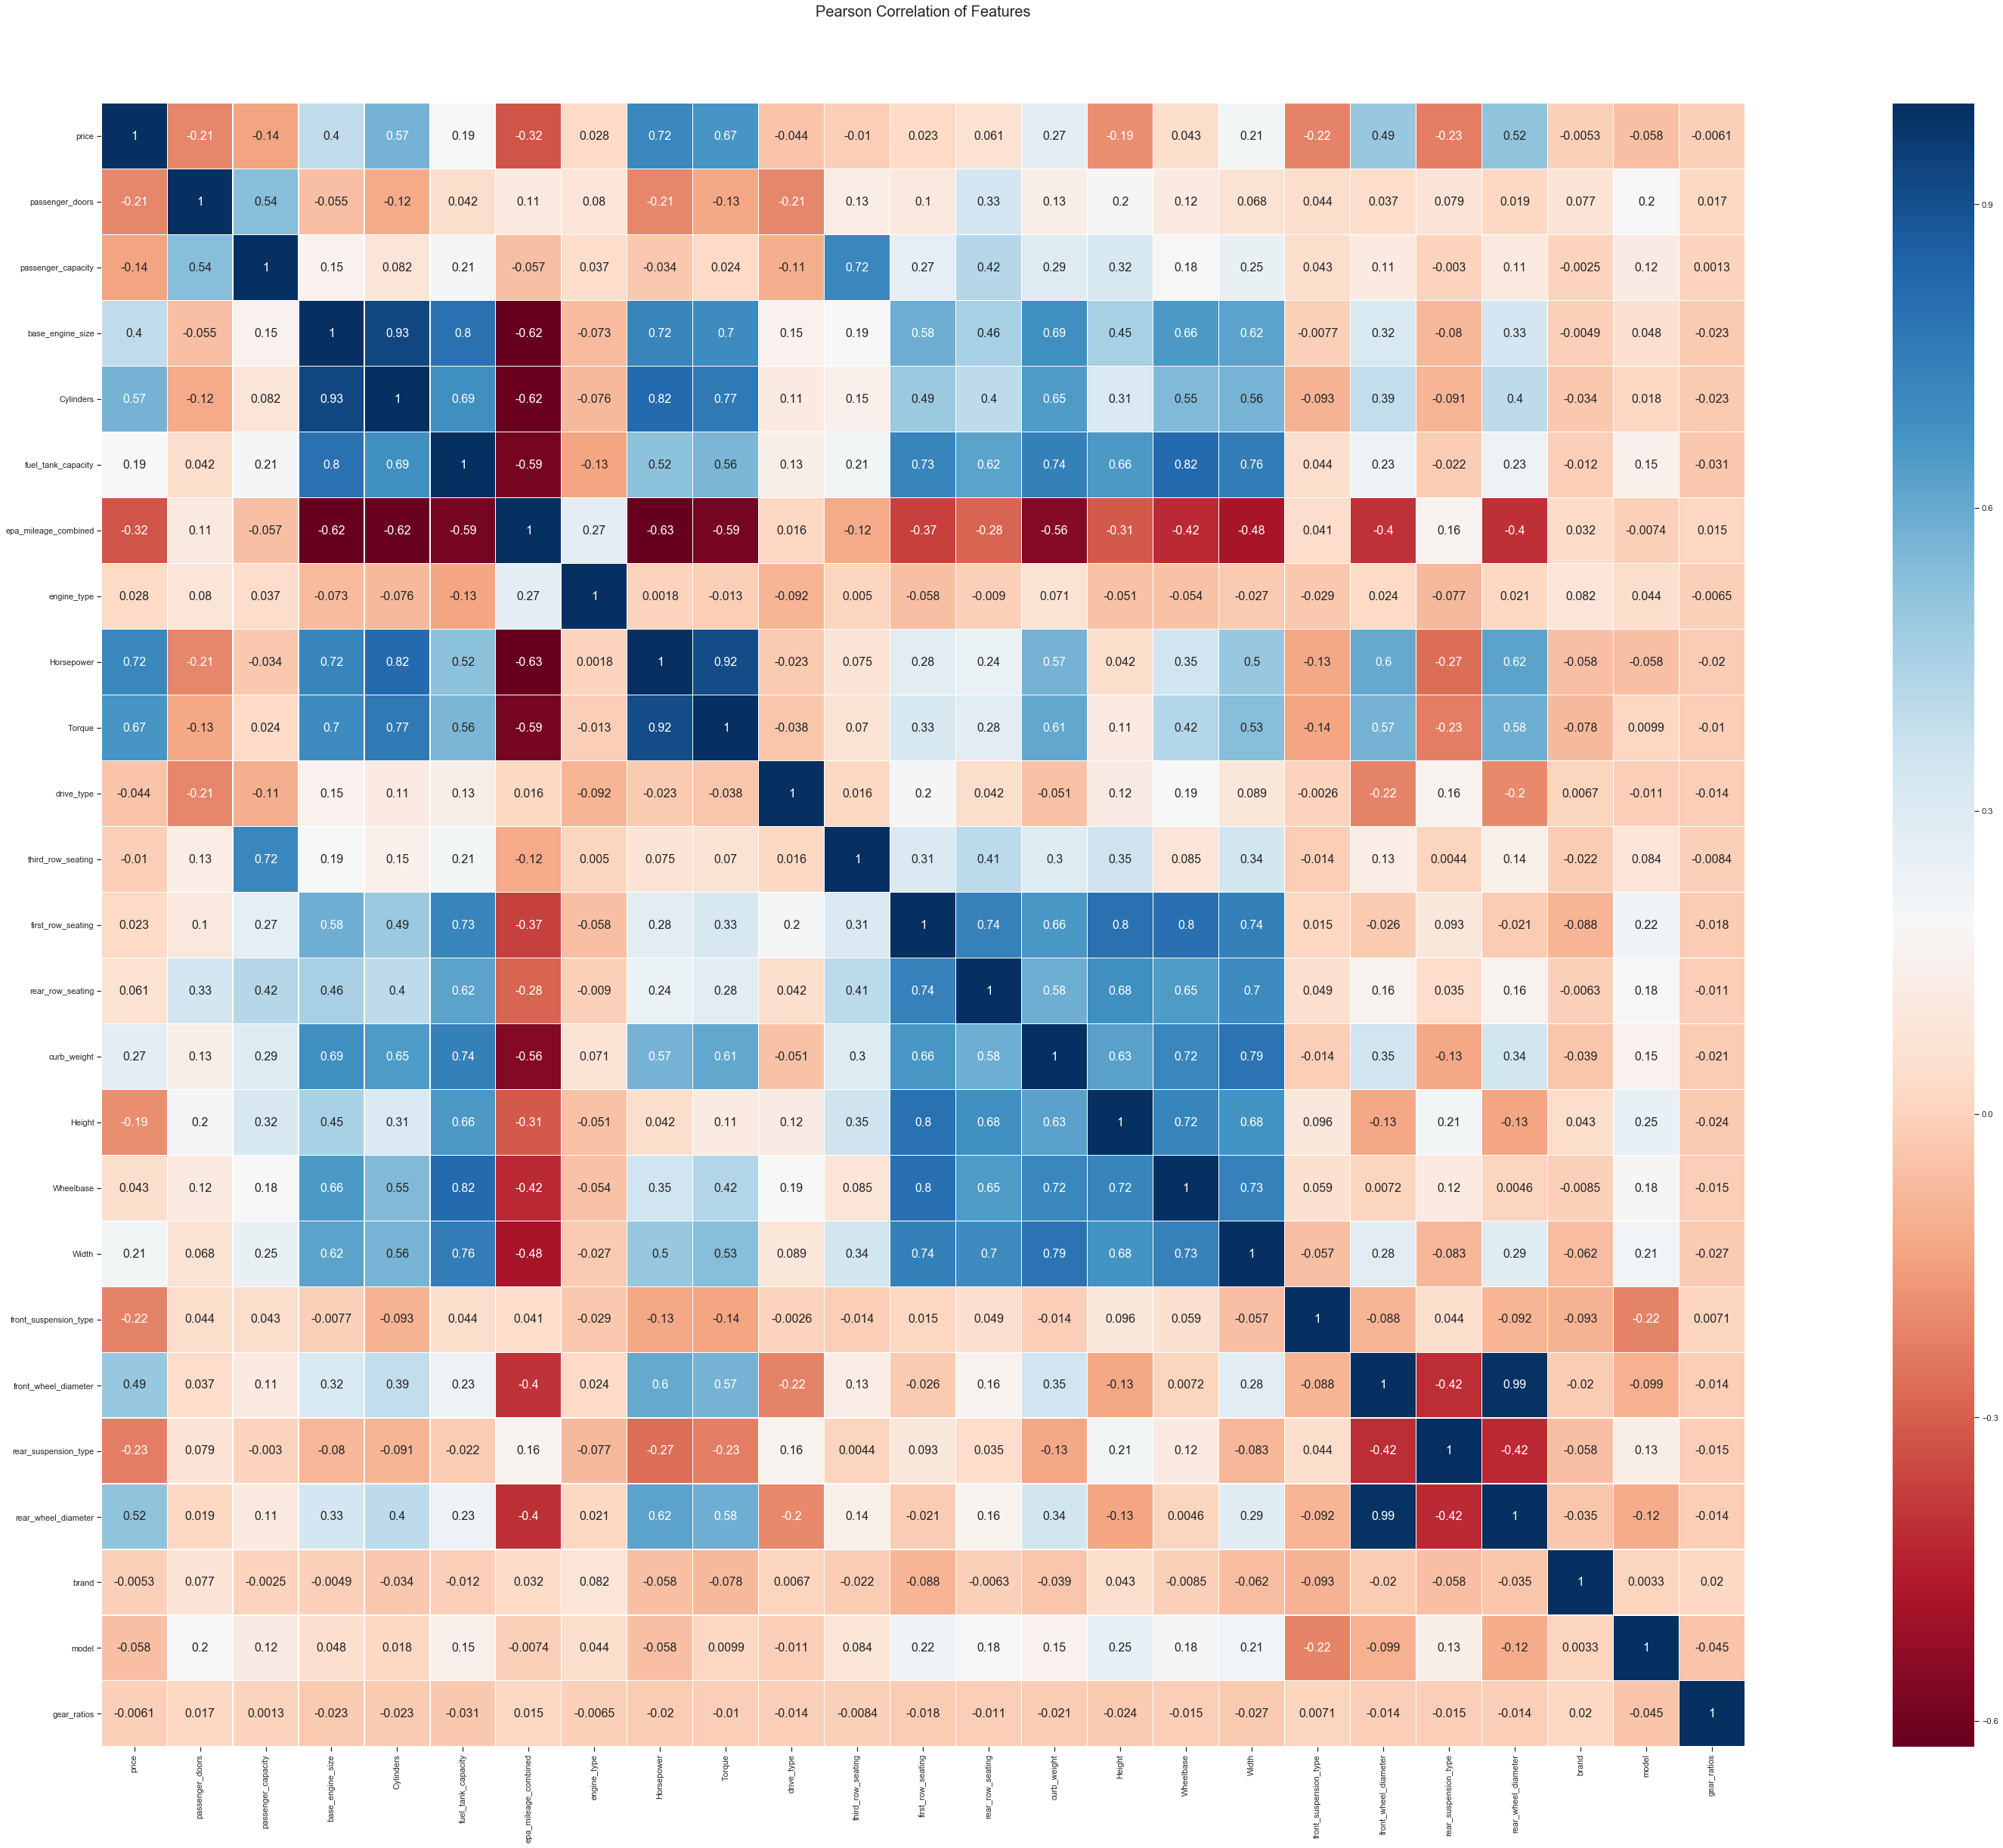

In [36]:
colormap = plt.cm.RdBu
plt.figure(figsize=(70,40))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(df_gas.fillna(method='bfill').corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
# Note that the categorical features have been neglected in the
# correlation matrix.

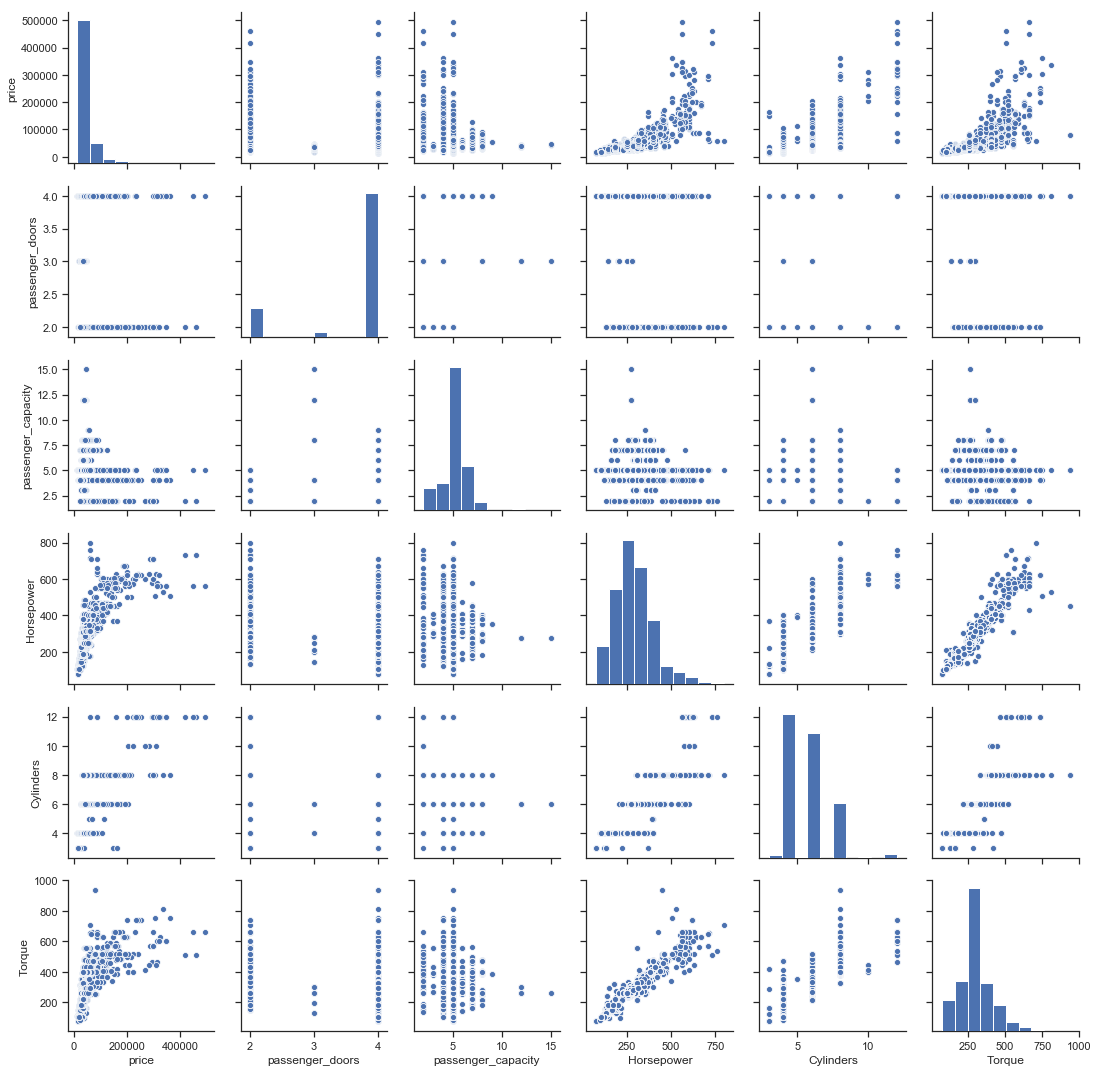

In [37]:
sns.pairplot(df_gas,vars=['price', 'passenger_doors', 'passenger_capacity','Horsepower',
            'Cylinders', 'Torque'])

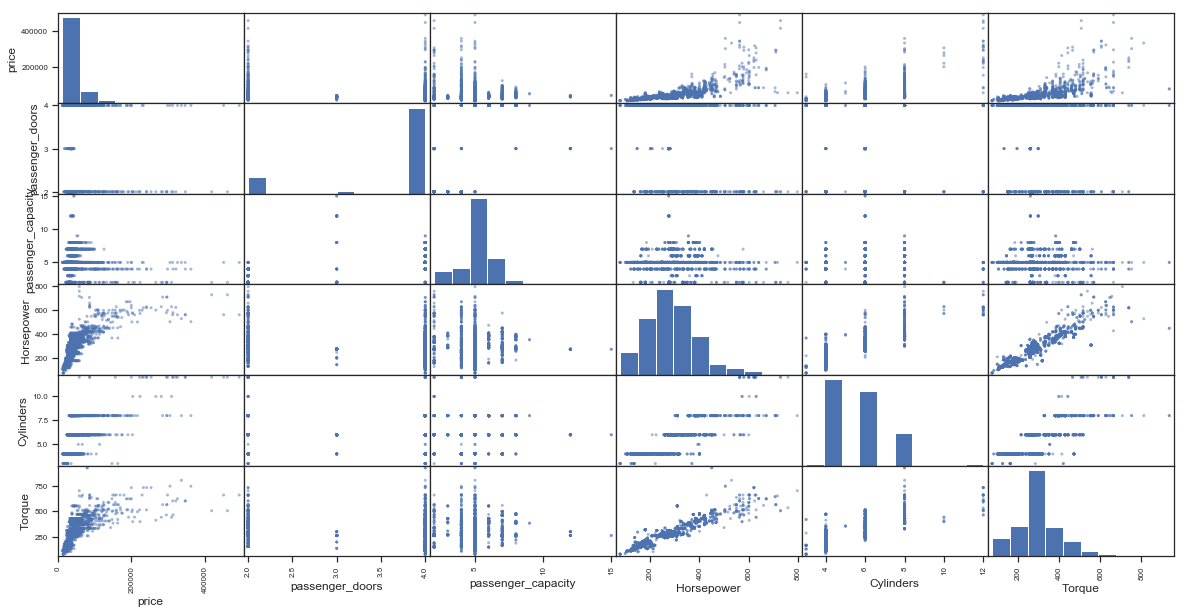

In [89]:
pd.plotting.scatter_matrix(df_gas[['price', 'passenger_doors', 'passenger_capacity','Horsepower',
            'Cylinders', 'Torque']], figsize=(20,10));

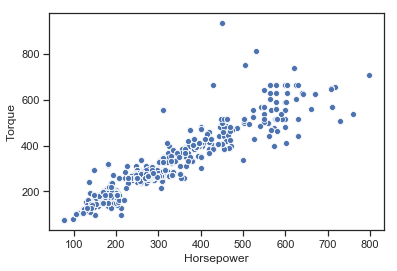

In [38]:
sns.scatterplot(x=df_gas['Horsepower'],y=df_gas['Torque'])

In [39]:
df_gas_sc = df_gas.copy()

In [40]:
df_gas_sc.columns

Index(['price', 'passenger_doors', 'passenger_capacity', 'base_engine_size',
       'Cylinders', 'fuel_tank_capacity', 'epa_mileage_combined',
       'engine_type', 'Horsepower', 'Torque', 'drive_type',
       'third_row_seating', 'first_row_seating', 'rear_row_seating',
       'curb_weight', 'Height', 'Wheelbase', 'Width', 'front_suspension_type',
       'front_wheel_diameter', 'rear_suspension_type', 'rear_wheel_diameter',
       'brand', 'model', 'gear_ratios'],
      dtype='object')

In [41]:
df_gas['fuel_tank_capacity'].value_counts()

26.000    135
13.200    127
21.100    113
18.500     91
19.500     85
19.000     73
15.800     72
14.500     70
17.400     69
15.900     68
25.000     60
20.000     56
15.300     50
16.600     49
18.000     47
24.600     45
14.000     40
23.000     39
24.000     39
18.800     36
31.000     33
18.600     31
16.000     31
26.400     30
11.900     29
14.800     28
17.200     27
16.300     25
21.000     25
34.000     24
         ... 
22.000      6
13.000      5
19.400      5
21.500      5
15.500      4
22.400      4
27.000      4
23.800      4
12.800      3
9.500       3
12.100      3
20.700      3
22.200      3
14.300      3
16.606      3
11.400      3
25.400      3
27.600      3
20.100      3
17.800      3
16.832      3
28.000      2
21.800      2
11.100      2
8.900       2
17.500      2
21.600      2
15.100      1
20.966      1
7.000       1
Name: fuel_tank_capacity, Length: 101, dtype: int64

In [42]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = MinMaxScaler()

In [43]:
for col in ['price','Horsepower','epa_mileage_combined', 'Torque', 'third_row_seating', 'fuel_tank_capacity',
            'first_row_seating', 'rear_row_seating','Height', 'Wheelbase','Width', 'gear_ratios','curb_weight']:
    df_gas_sc[col] = scaler.fit_transform(df_gas_sc[[col]])

In [44]:
df_gas_sc.describe()

,price,passenger_doors,passenger_capacity,Cylinders,fuel_tank_capacity,epa_mileage_combined,engine_type,Horsepower,Torque,third_row_seating,...,rear_row_seating,curb_weight,Height,Wheelbase,Width,front_suspension_type,front_wheel_diameter,rear_suspension_type,rear_wheel_diameter,gear_ratios
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,0.077969,3.652272,5.068376,5.502474,0.298530,0.115566,1.033288,0.297711,0.255389,0.065838,...,0.336653,0.294379,0.305598,0.302823,0.495736,5.352677,18.091318,3.772380,18.116959,0.001916
std,0.084786,0.740437,1.423034,1.628081,0.134547,0.076631,0.179429,0.150535,0.131852,0.166935,...,0.131728,0.100605,0.147980,0.181710,0.171228,2.673965,1.360108,2.032015,1.379024,0.029971
min,0.000000,2.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,14.000000,0.000000
25%,0.039769,4.000000,5.000000,4.000000,0.214634,0.072289,1.000000,0.180807,0.191638,0.000000,...,0.260151,0.221387,0.189602,0.179634,0.378378,2.000000,17.000000,3.000000,17.000000,0.000227
50%,0.055442,4.000000,5.000000,6.000000,0.280488,0.096386,1.000000,0.286509,0.226481,0.000000,...,0.325497,0.295796,0.307339,0.247140,0.472973,6.000000,18.000000,3.000000,18.000000,0.000733
75%,0.083214,4.000000,5.000000,6.000000,0.358537,0.144578,1.000000,0.385257,0.342625,0.000000,...,0.411746,0.385420,0.396024,0.349542,0.639640,6.000000,19.000000,5.000000,19.000000,0.001794
max,1.000000,4.000000,15.000000,12.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,22.000000,10.000000,22.000000,1.000000


In [45]:
pkl.dump(df_gas_sc, open('df_pickles/df_gas_sc.p','wb'))

In [46]:
tobe_dummied= ['passenger_doors','passenger_capacity','Cylinders', 'engine_type',
 'drive_type', 'front_suspension_type','front_wheel_diameter','rear_suspension_type',
'rear_wheel_diameter', 'brand']

In [47]:
df_gas_sc.columns

Index(['price', 'passenger_doors', 'passenger_capacity', 'base_engine_size',
       'Cylinders', 'fuel_tank_capacity', 'epa_mileage_combined',
       'engine_type', 'Horsepower', 'Torque', 'drive_type',
       'third_row_seating', 'first_row_seating', 'rear_row_seating',
       'curb_weight', 'Height', 'Wheelbase', 'Width', 'front_suspension_type',
       'front_wheel_diameter', 'rear_suspension_type', 'rear_wheel_diameter',
       'brand', 'model', 'gear_ratios'],
      dtype='object')

In [48]:
df_gas_sc['drive_type']

/cars/2019/acura/ilx/79088     2
/cars/2019/acura/ilx/79090     2
/cars/2019/acura/ilx/79089     2
/cars/2019/acura/ilx/79092     2
/cars/2019/acura/ilx/79091     2
/cars/2019/acura/mdx/77624     2
/cars/2019/acura/mdx/77621     2
/cars/2019/acura/mdx/77620     2
/cars/2019/acura/mdx/77623     2
/cars/2019/acura/mdx/77622     2
/cars/2019/acura/mdx/77619     0
/cars/2019/acura/mdx/77625     0
/cars/2019/acura/mdx/77626     0
/cars/2019/acura/mdx/77628     0
/cars/2019/acura/mdx/77627     0
/cars/2019/acura/mdx/77631     0
/cars/2019/acura/mdx/77629     0
/cars/2019/acura/mdx/77630     0
/cars/2019/acura/nsx/79093     0
/cars/2019/acura/rdx/77635     0
/cars/2019/acura/rdx/77633     0
/cars/2019/acura/rdx/77632     0
/cars/2019/acura/rdx/77634     0
/cars/2019/acura/rdx/77639     2
/cars/2019/acura/rdx/77637     2
/cars/2019/acura/rdx/77636     2
/cars/2019/acura/rdx/77638     2
/cars/2019/acura/rlx/77640     0
/cars/2019/acura/rlx/79094     2
/cars/2019/acura/tlx/77649     2
          

In [49]:
df_gas_sc['passenger_capacity'].value_counts()

5     1284
4      247
7      219
6      182
2      166
8       73
3       34
12      14
15       2
9        2
Name: passenger_capacity, dtype: int64

In [50]:
df_gas_sc_dmd = df_gas_sc.copy()

In [51]:
list1=[]
for col in tobe_dummied:
    list1.append(pd.get_dummies(df_gas_sc[col], drop_first=True, prefix = col ,prefix_sep='_'))

In [52]:
df_gas_sc_dmd = pd.concat(list1, 1)

In [54]:
df_gas_sc_dmd

,passenger_doors_3,passenger_doors_4,passenger_capacity_3,passenger_capacity_4,passenger_capacity_5,passenger_capacity_6,passenger_capacity_7,passenger_capacity_8,passenger_capacity_9,passenger_capacity_12,...,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_39,brand_40,brand_41
/cars/2019/acura/ilx/79088,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79090,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79089,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79092,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79091,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77624,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77621,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77620,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77623,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77622,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_gas_sc_dmd = pd.concat([df_gas_sc.drop(tobe_dummied,1),df_gas_sc_dmd],1)

In [56]:
df_gas_sc_dmd

,price,base_engine_size,fuel_tank_capacity,epa_mileage_combined,Horsepower,Torque,third_row_seating,first_row_seating,rear_row_seating,curb_weight,...,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_39,brand_40,brand_41
/cars/2019/acura/ilx/79088,0.028002,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.156797,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79090,0.031648,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.160939,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79089,0.035815,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.164314,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79092,0.035607,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.161246,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/ilx/79091,0.039774,2.4,0.151220,0.168675,0.171071,0.123113,0.000000,0.156915,0.189442,0.164928,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77624,0.066338,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.300552,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77621,0.090819,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.309451,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77620,0.094986,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.316508,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77623,0.076756,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.303928,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/acura/mdx/77622,0.080923,3.5,0.304878,0.108434,0.294854,0.224158,0.351861,0.250347,0.381952,0.304388,...,0,0,0,0,0,0,0,0,0,0


In [58]:
pkl.dump(df_gas_sc_dmd, open('df_pickles/df_gas_sc_dmd.p','wb'))

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

In [ ]:
#  pd.get_dummies(le.fit_transform(df_gas_sc_dmd[['Passenger Capacity']]), drop_first=True, prefix_sep='_')

## df_elec plots

In [59]:
elec_col_list_floats = [ 'Battery Range',
                         'third_row_seating', 'first_row_seating', 'rear_row_seating','Curb weight',
                         'Width', 'Height', 'Wheelbase']

In [60]:
elec_col_list_integers = ['price', 'Passenger Doors', 'Passenger Capacity','Horsepower',
                         'Horsepower', 'Torque']

In [61]:
for col in elec_col_list_floats:
    type_convertor_float(df_elec, col)

In [62]:
for col in elec_col_list_integers:
    type_convertor_int(df_elec, col)

In [63]:
df_elec.drop(['Dead Weight Hitch - Max Tongue Weight',
            'Dead Weight Hitch - Max Trailer Weight', 'Front Tire Size', 'Rear Tire Size','Transmission'
               ], 1, inplace=True)

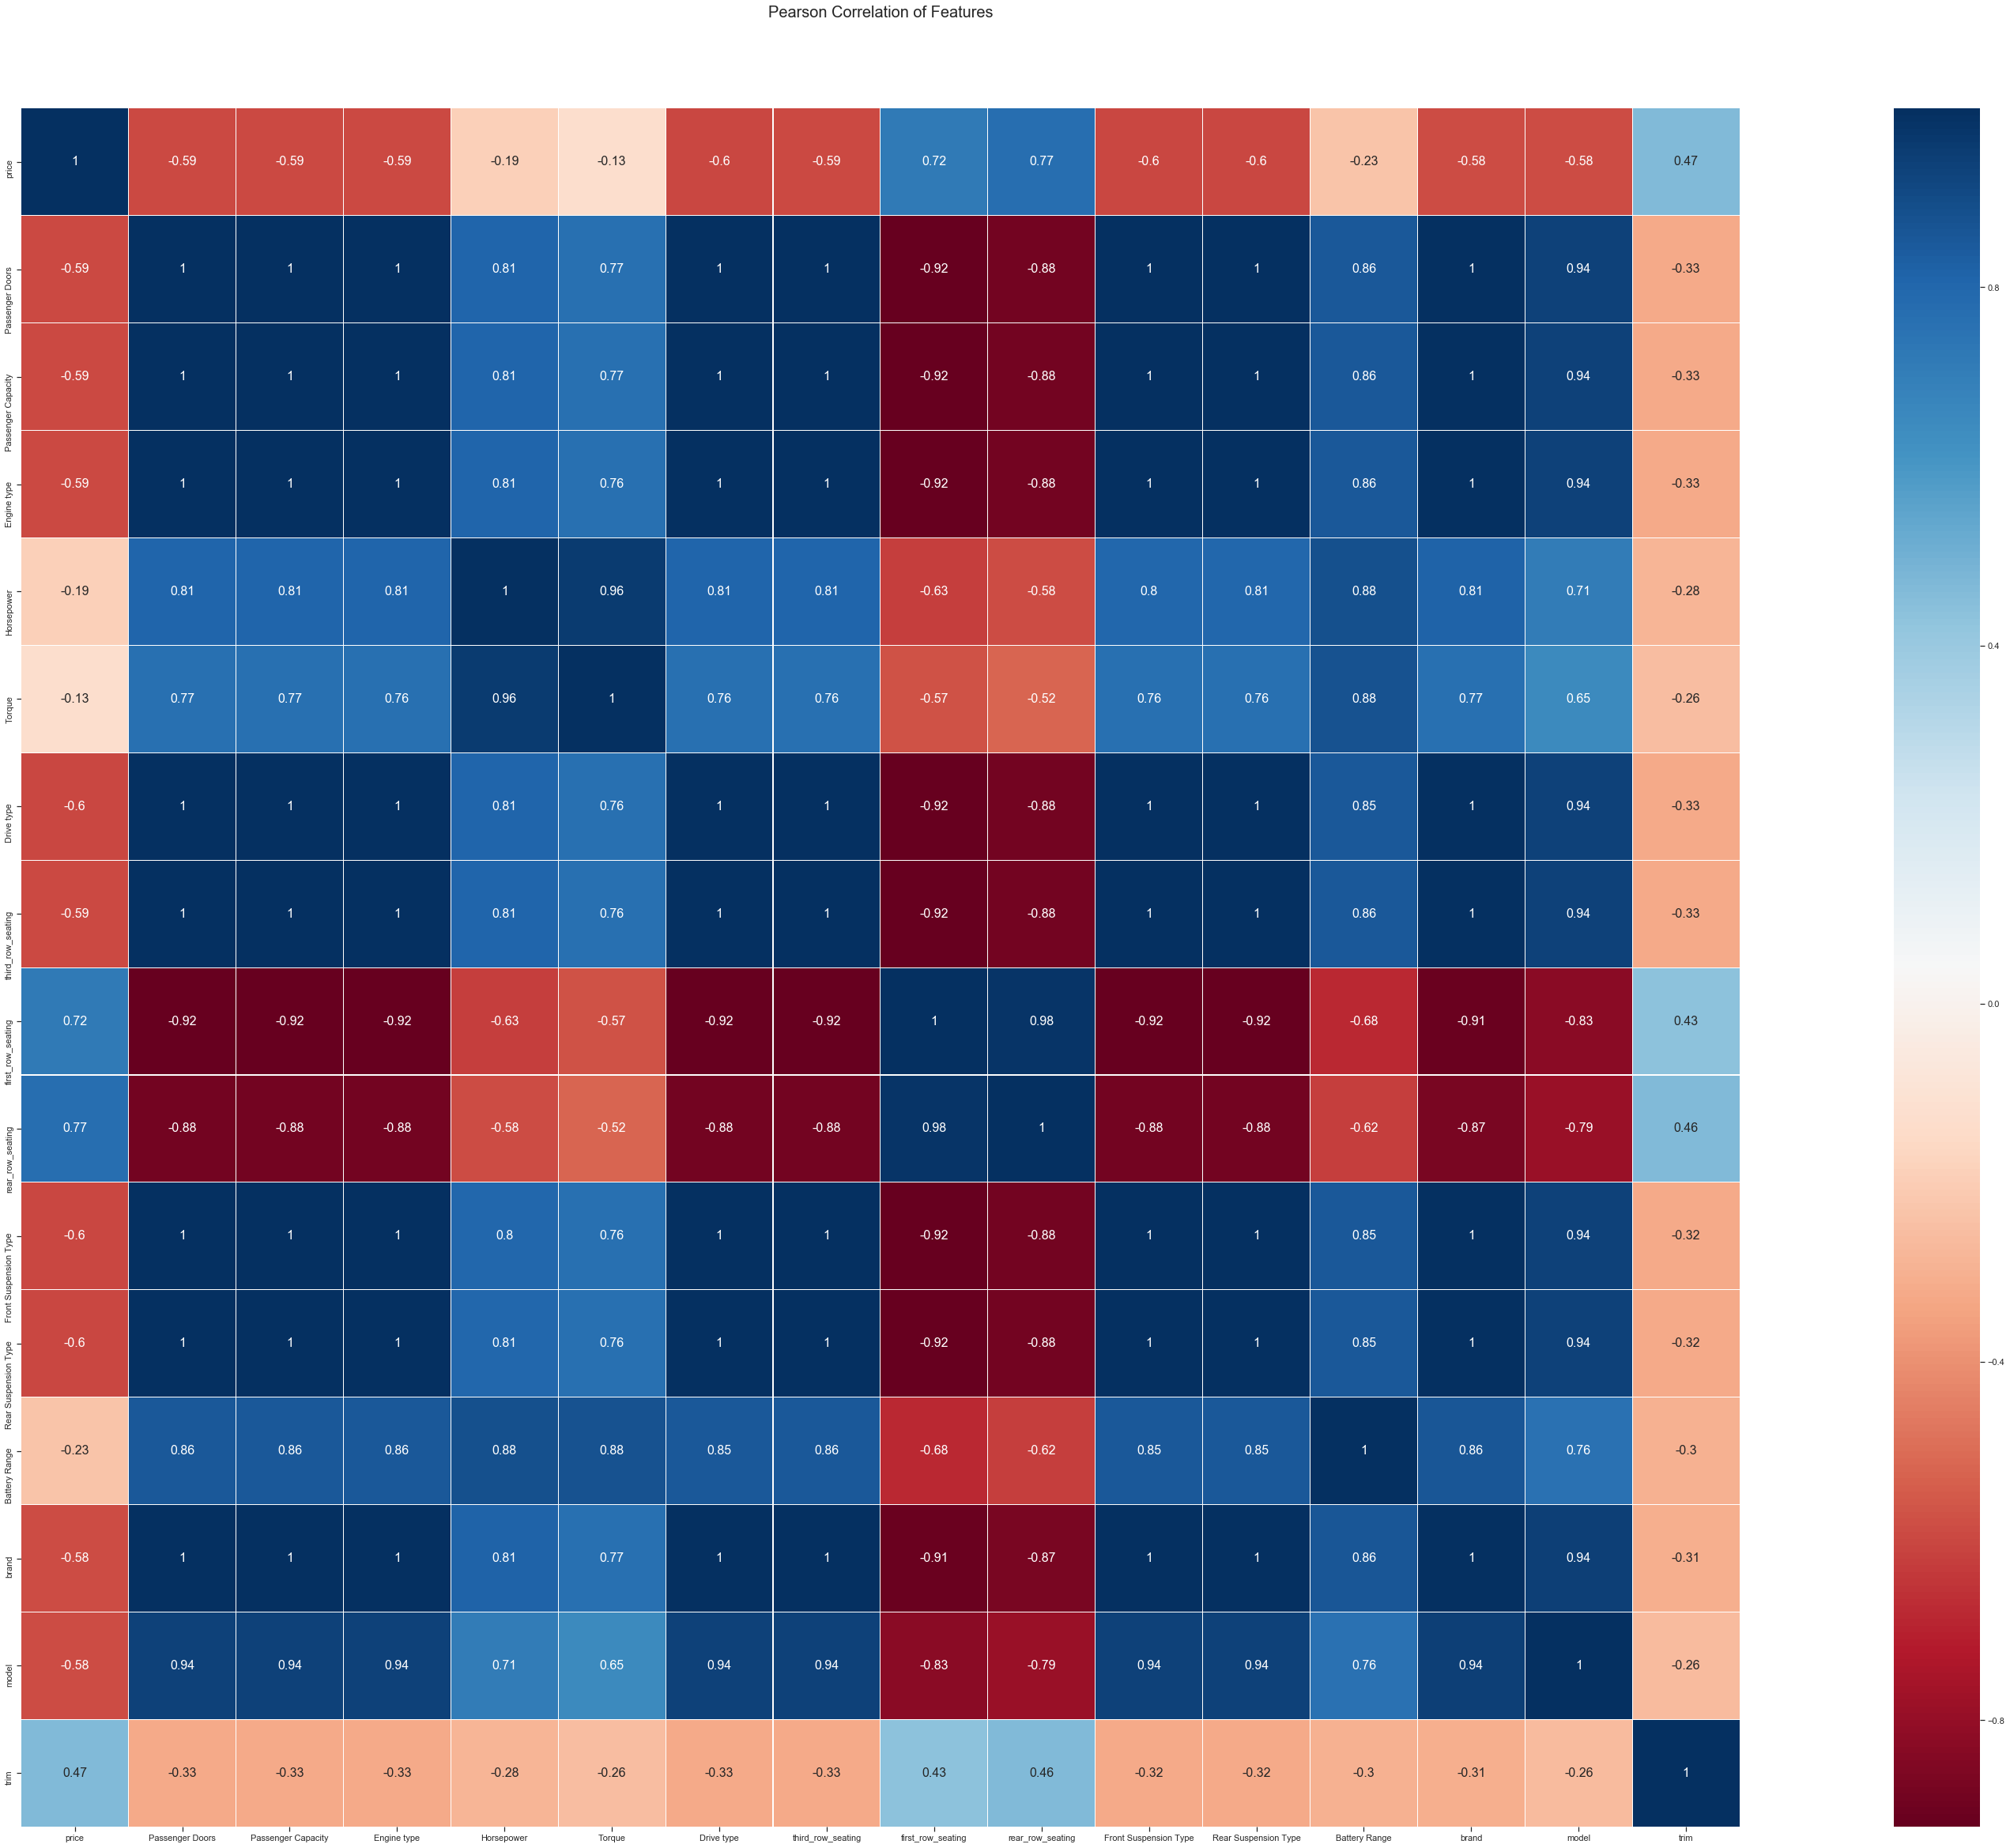

In [64]:
colormap = plt.cm.RdBu
plt.figure(figsize=(70,40))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(df_elec.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
# Note that the categorical features have been neglected in the
# correlation matrix.

In [65]:
df_elec.isna().sum().sum()

0

ValueError: color kwarg must have one color per data set. 58 data sets and 1 colors were provided

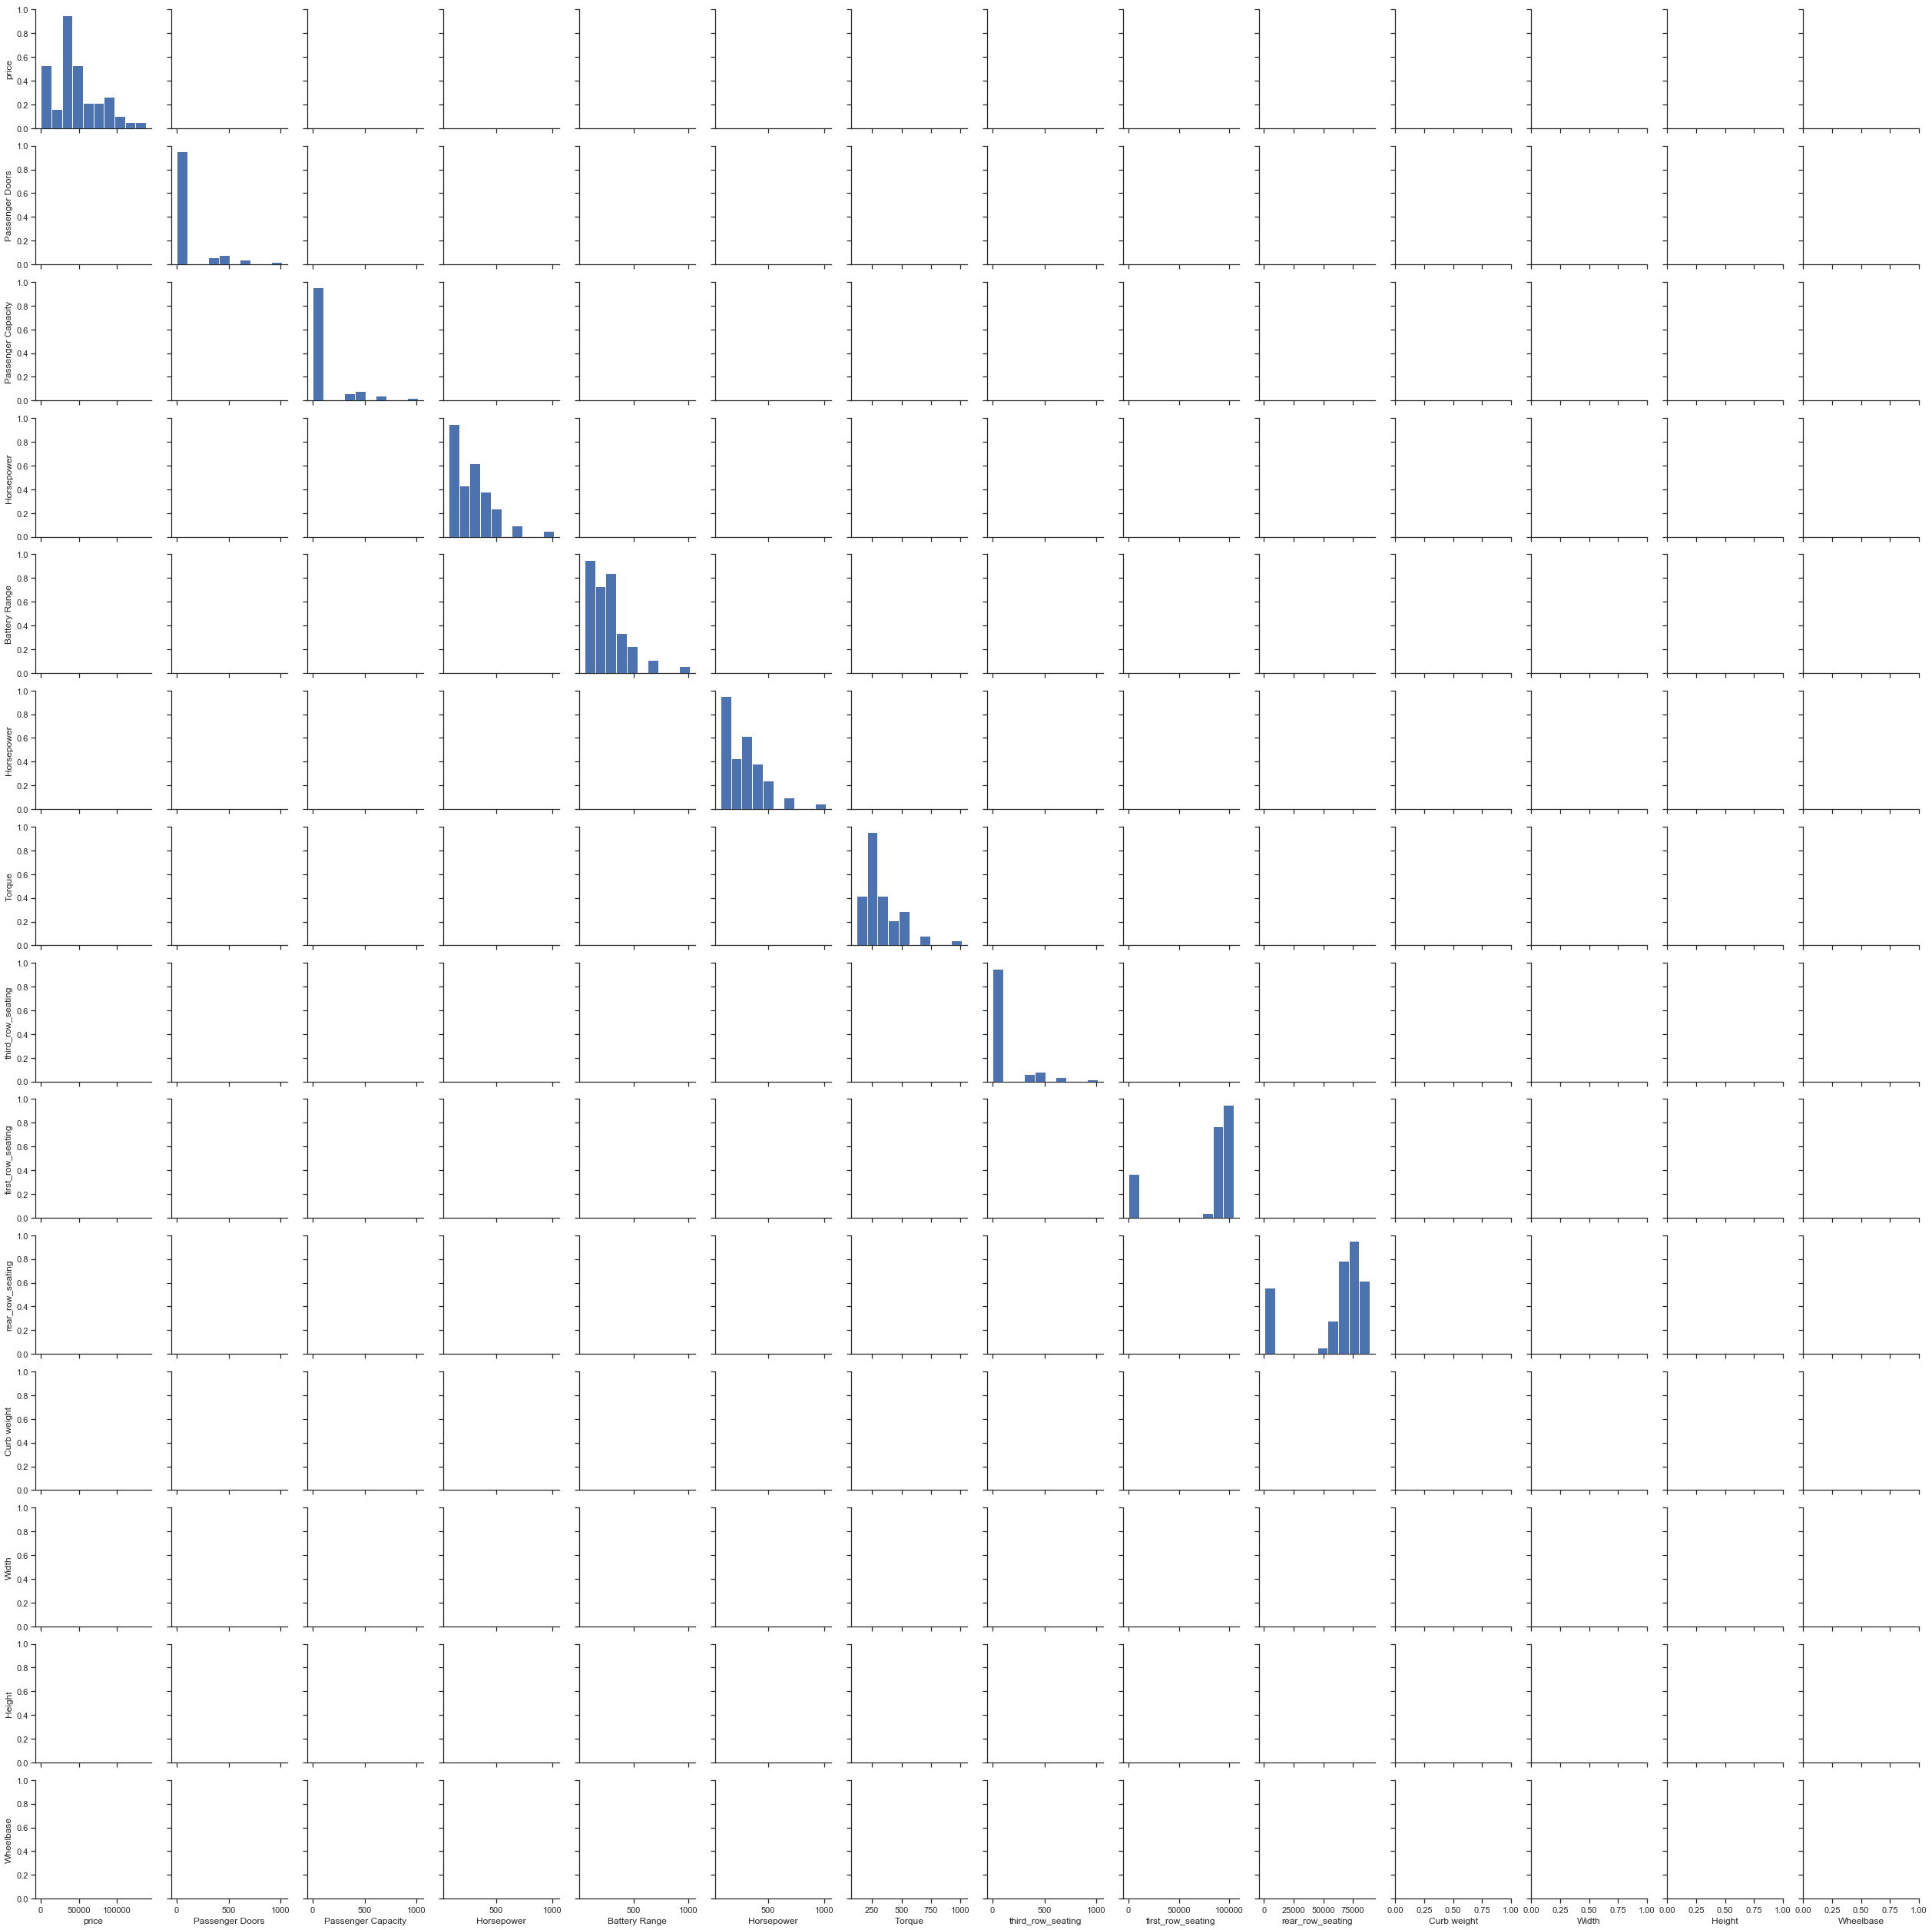

In [66]:
sns.pairplot(df_elec, vars=['price', 'Passenger Doors', 'Passenger Capacity','Horsepower', 'Battery Range','Horsepower', 'Torque', 
                         'third_row_seating', 'first_row_seating', 'rear_row_seating','Curb weight',
                         'Width', 'Height', 'Wheelbase'])

In [67]:
df_elec_sc = df_elec.copy()

In [68]:
df_elec_sc.rename(columns={"Passenger Doors": "passenger_doors", "Passenger Capacity": "passenger_capacity",
                      'Battery Range': "battery_range", 'Engine type':'engine_type',
                      'Curb weight':'curb_weight', 'Drive type':'drive_type', 'Front Suspension Type':'front_suspension_type',
       'Front Wheel Diameter': 'front_wheel_diameter', 'Rear Suspension Type':'rear_suspension_type', 'Rear Wheel Diameter': 'rear_wheel_diameter'}, inplace=True)

In [69]:
for col in ['price','Horsepower','Torque', 'third_row_seating', 'battery_range',
            'first_row_seating', 'rear_row_seating','Height', 'Wheelbase','Width', 'curb_weight']:
    df_elec_sc[col] = scaler.fit_transform(df_elec_sc[[col]])

In [70]:
df_elec_sc.describe()

,price,passenger_doors,passenger_capacity,engine_type,Horsepower,Torque,drive_type,third_row_seating,first_row_seating,rear_row_seating,curb_weight,Height,Wheelbase,Width,front_suspension_type,rear_suspension_type,battery_range,brand,model,trim
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.326037,96.310345,96.982759,93.206897,0.212200,0.228935,94.568966,0.092011,0.745875,0.676131,0.622407,0.091636,0.113896,0.094022,96.862069,97.086207,0.219575,116.948276,234.086207,1086.758621
std,0.234026,219.841107,219.553893,221.170472,0.188350,0.179218,220.589172,0.218332,0.346967,0.326998,0.296585,0.208620,0.196532,0.206217,219.611255,219.520073,0.179353,211.318951,171.528452,630.064027
min,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,4.000000,14.000000,12.000000
25%,0.210457,4.000000,5.000000,0.000000,0.078778,0.112570,0.500000,0.000000,0.827468,0.655568,0.491253,0.004939,0.031726,0.006745,2.000000,3.000000,0.098326,19.000000,137.000000,485.250000
50%,0.283652,4.000000,5.000000,0.000000,0.176313,0.192179,2.000000,0.000000,0.880713,0.789111,0.738826,0.005436,0.040243,0.009169,6.000000,3.000000,0.191423,38.000000,155.000000,1018.500000
75%,0.430060,4.000000,5.000000,0.000000,0.323687,0.299162,3.000000,0.000000,0.928766,0.822485,0.796308,0.010036,0.045779,0.015386,6.000000,9.000000,0.276412,41.500000,268.000000,1799.750000
max,1.000000,1013.000000,1013.000000,1013.000000,1.000000,1.000000,1013.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1013.000000,1013.000000,1.000000,1013.000000,1013.000000,1892.000000


In [71]:
pkl.dump(df_elec_sc, open('df_pickles/df_elec_sc.p','wb'))

In [72]:
tobe_dummied_elec= ['passenger_doors','passenger_capacity','engine_type',
 'drive_type', 'front_suspension_type','front_wheel_diameter','rear_suspension_type',
'rear_wheel_diameter', 'brand']

In [73]:
df_elec_sc.columns

Index(['price', 'passenger_doors', 'passenger_capacity', 'engine_type',
       'Horsepower', 'Torque', 'drive_type', 'third_row_seating',
       'first_row_seating', 'rear_row_seating', 'curb_weight', 'Height',
       'Wheelbase', 'Width', 'front_suspension_type', 'front_wheel_diameter',
       'rear_suspension_type', 'rear_wheel_diameter', 'extra_options',
       'battery_range', 'brand', 'model', 'trim'],
      dtype='object')

In [74]:
df_elec_sc['drive_type']

/cars/2019/bmw/i3/79144                           3
/cars/2019/bmw/i3/79143                           3
/cars/2019/bmw/i3/79146                           3
/cars/2019/bmw/i3/79145                           3
/cars/2019/fiat/500e/79189                        2
/cars/2019/honda/clarity/79303                    2
/cars/2019/hyundai/ioniq/79328                    2
/cars/2019/hyundai/ioniq/79329                    2
/cars/2019/hyundai/kona-electric/79331            2
/cars/2019/hyundai/kona-electric/79332            2
/cars/2019/hyundai/kona-electric/79333            2
/cars/2019/hyundai/nexo/79343                     2
/cars/2019/hyundai/nexo/79344                     2
/cars/2019/jaguar/i-pace/78545                    0
/cars/2019/jaguar/i-pace/78546                    0
/cars/2019/jaguar/i-pace/78544                    0
/cars/2019/jaguar/i-pace/78547                    0
/cars/2019/kia/niro/79494                         2
/cars/2019/kia/soul/79507                         2
/cars/2019/n

In [75]:
df_elec_sc['passenger_capacity'].value_counts()

5       37
4        6
2        5
382      2
687      2
443      1
1013     1
487      1
486      1
485      1
354      1
Name: passenger_capacity, dtype: int64

In [76]:
df_elec_sc_dmd = df_elec_sc.copy()

In [77]:
list2=[]
for col in tobe_dummied_elec:
    list2.append(pd.get_dummies(df_elec_sc_dmd[col], drop_first=True, prefix = col ,prefix_sep='_'))

In [81]:
df_elec_sc_dmd = pd.concat(list2, 1)

In [82]:
df_elec_sc_dmd.iloc[:,24:40]

,engine_type_487,engine_type_687,engine_type_1013,drive_type_2,drive_type_3,drive_type_354,drive_type_382,drive_type_443,drive_type_485,drive_type_486,drive_type_487,drive_type_687,drive_type_1013,front_suspension_type_6,front_suspension_type_354,front_suspension_type_382
/cars/2019/bmw/i3/79144,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/bmw/i3/79143,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/bmw/i3/79146,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/bmw/i3/79145,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/fiat/500e/79189,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/honda/clarity/79303,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/hyundai/ioniq/79328,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/hyundai/ioniq/79329,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/hyundai/kona-electric/79331,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
/cars/2019/hyundai/kona-electric/79332,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [83]:
df_elec_sc_dmd = pd.concat([df_elec_sc.drop(tobe_dummied_elec,1),df_elec_sc_dmd],1)

In [84]:
df_elec_sc_dmd

,price,Horsepower,Torque,third_row_seating,first_row_seating,rear_row_seating,curb_weight,Height,Wheelbase,Width,...,brand_40,brand_42,brand_354,brand_382,brand_443,brand_485,brand_486,brand_487,brand_687,brand_1013
/cars/2019/bmw/i3/79144,0.320358,0.096463,0.073743,0.000000,0.823716,0.653103,0.590971,0.006795,0.029277,0.006112,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/bmw/i3/79143,0.348328,0.096463,0.073743,0.000000,0.823716,0.653103,0.659594,0.006795,0.029277,0.006112,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/bmw/i3/79146,0.343606,0.108253,0.090503,0.000000,0.823716,0.653103,0.606321,0.006481,0.029277,0.006745,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/bmw/i3/79145,0.371576,0.108253,0.090503,0.000000,0.823716,0.653103,0.667043,0.006481,0.029277,0.006745,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/fiat/500e/79189,0.238699,0.033226,0.032402,0.000000,0.749127,0.507673,0.592777,0.003868,0.017992,0.000000,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/honda/clarity/79303,0.263473,0.086817,0.115084,0.000000,0.944397,0.862102,0.828442,0.001882,0.036836,0.010328,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/hyundai/ioniq/79328,0.217667,0.040729,0.111732,0.000000,0.887243,0.822485,0.634312,0.000732,0.034707,0.008009,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/hyundai/ioniq/79329,0.264890,0.040729,0.111732,0.000000,0.866743,0.822485,0.634312,0.000732,0.034707,0.008009,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/hyundai/kona-electric/79331,0.298200,0.129689,0.192179,0.000000,0.838725,0.768355,0.771106,0.005018,0.030555,0.007166,...,0,0,0,0,0,0,0,0,0,0
/cars/2019/hyundai/kona-electric/79332,0.265870,0.129689,0.192179,0.000000,0.874183,0.768355,0.758691,0.005018,0.030555,0.007166,...,0,0,0,0,0,0,0,0,0,0


In [85]:
pkl.dump(df_elec_sc_dmd, open('df_pickles/df_elec_sc_dmd.p','wb'))